## Assignment

### Part I

#### Clean your data

+ Read in temp_data.txt
    + It won't be easy! You'll need to find a way to clean the data
    + Try opening the file in a text editor first
+ Read in temp_X.csv
+ Merge the X variable from temp_X with the data from temp_data
+ Note that we discussed this in class, but it's something you'll just need to practice on your own. 
+ You will struggle with this and it's ok
+ Check out the documentation for read_csv() in the pandas package


### Part II

#### Run a linear regression
+ Using X to predict temperature 
+ Interpret your coefficients!
+ What is one potential use for this linear regression equation? 
+ What does this linear regression mean? 
+ Is this a good model? Why or why not? 

    


In [1]:
import pandas as pd

In [2]:
df  = pd.read_csv('/Users/edwardlee/Desktop/df-sf-32/DS-SF-32/lessons/lesson-6/temp_data.txt', sep='\t')
df1 = pd.read_csv('/Users/edwardlee/Desktop/df-sf-32/DS-SF-32/lessons/lesson-6/temp_X.csv')

In [3]:
df.head()

Station ID Series Number Date Temperature (C) Uncertainty (C) Observations Time of Observation 
25398 1 1986.708 26.611 0.0507 30                                                 24                                              
        1986.875 27.593 0.0507 30                                                 24                                              
        1986.958 28.226 0.0499 31                                                 24                                              
        1987.042 27.581 0.0499 31                                                 24                                              
        1987.125 27.996 0.0525 28                                                 24

In [4]:
df.reset_index(inplace=True)

In [5]:
df.head()

level_0  level_1   level_2  level_3  level_4  level_5  \
0    25398        1  1986.708   26.611   0.0507       30   
1    25398        1  1986.875   27.593   0.0507       30   
2    25398        1  1986.958   28.226   0.0499       31   
3    25398        1  1987.042   27.581   0.0499       31   
4    25398        1  1987.125   27.996   0.0525       28   

   Station ID Series Number Date Temperature (C) Uncertainty (C) Observations Time of Observation   
0                                                 24                                                
1                                                 24                                                
2                                                 24                                                
3                                                 24                                                
4                                                 24

In [6]:
df.columns = ['Station_ID', 'Series_Number', 'Date', 'Temperature (C)', 
             'Uncertainty (C)', 'Observations', 'Time of Observation']

In [7]:
df.head()

Station_ID  Series_Number      Date  Temperature (C)  Uncertainty (C)  \
0       25398              1  1986.708           26.611           0.0507   
1       25398              1  1986.875           27.593           0.0507   
2       25398              1  1986.958           28.226           0.0499   
3       25398              1  1987.042           27.581           0.0499   
4       25398              1  1987.125           27.996           0.0525   

   Observations  Time of Observation  
0            30                   24  
1            30                   24  
2            31                   24  
3            31                   24  
4            28                   24

In [8]:
df1.head()

Unnamed: 0  Station_ID  Series_Number      Date        X
0           0       25398              1  1986.708  79.8998
1           1       25398              1  1986.875  81.6674
2           2       25398              1  1986.958  82.8068
3           3       25398              1  1987.042  81.6458
4           4       25398              1  1987.125  82.3928

In [9]:
df1.drop('Unnamed: 0', inplace=True, axis=1)

In [10]:
df1.head()

Station_ID  Series_Number      Date        X
0       25398              1  1986.708  79.8998
1       25398              1  1986.875  81.6674
2       25398              1  1986.958  82.8068
3       25398              1  1987.042  81.6458
4       25398              1  1987.125  82.3928

In [11]:
df_m = pd.merge(df, df1, how='inner', on=['Station_ID', 'Series_Number', 'Date'])

In [12]:
df_m.head()

Station_ID  Series_Number      Date  Temperature (C)  Uncertainty (C)  \
0       25398              1  1986.708           26.611           0.0507   
1       25398              1  1986.875           27.593           0.0507   
2       25398              1  1986.958           28.226           0.0499   
3       25398              1  1987.042           27.581           0.0499   
4       25398              1  1987.125           27.996           0.0525   

   Observations  Time of Observation        X  
0            30                   24  79.8998  
1            30                   24  81.6674  
2            31                   24  82.8068  
3            31                   24  81.6458  
4            28                   24  82.3928

In [13]:
df_m.shape

(141637, 8)

In [14]:
X = df_m[['X']]
y = df_m['Temperature (C)'].values

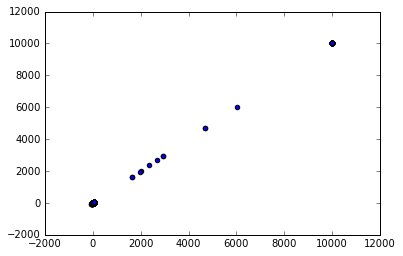

Score/R^2:  1.0


In [15]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

lr      = LinearRegression()
model   = lr.fit(X, y)
predict = model.predict(X)
plt.scatter(predict, y)
plt.show()
print 'Score/R^2: ', model.score(X, y)

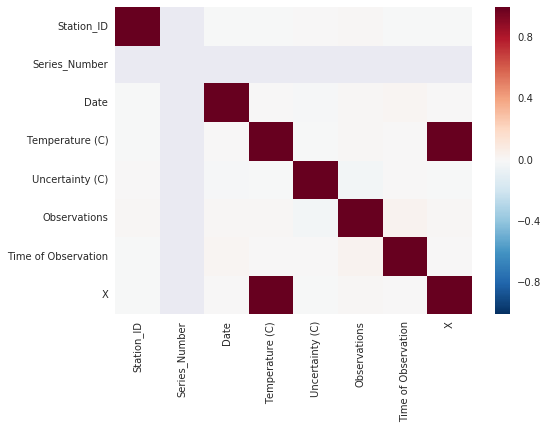

In [26]:
import seaborn as sns

sns.heatmap(df_m.corr(method='pearson'))

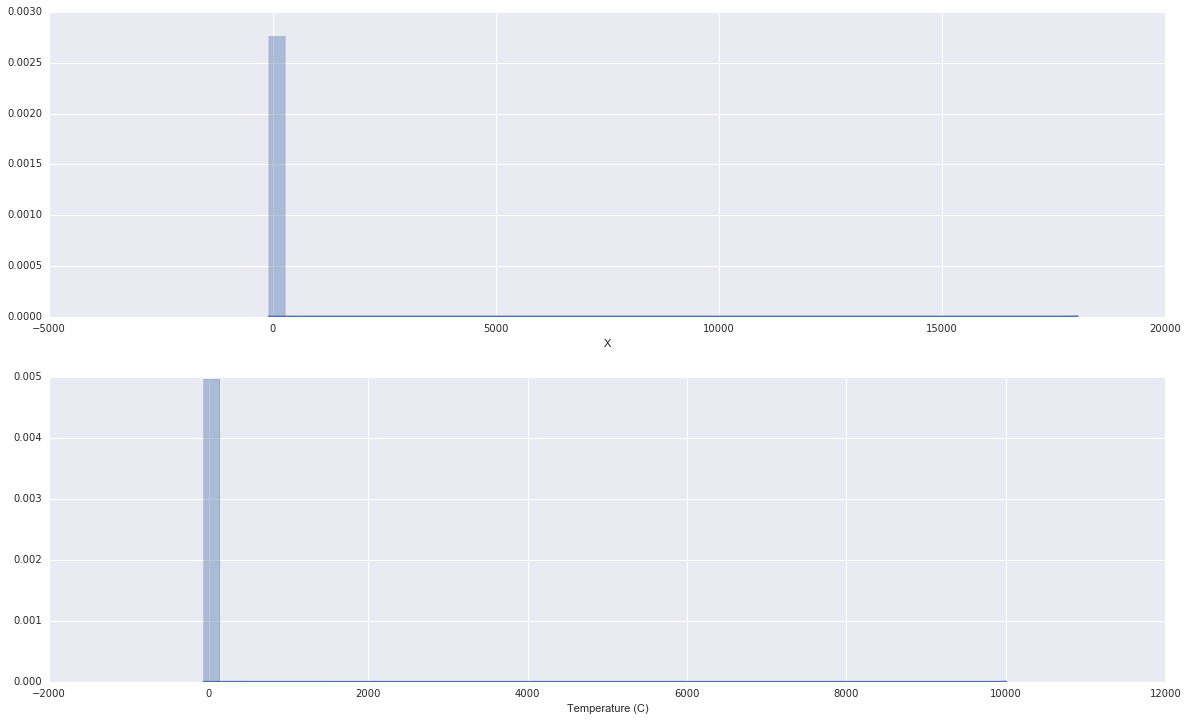

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,12))

sns.distplot(df_m['X'], ax=ax1)
sns.distplot(df_m['Temperature (C)'], ax=ax2)